# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syakib Binnur
- **Email:** syakibb19@gmail.com
- **ID Dicoding:** syakib

## Menentukan Pertanyaan Bisnis

1. Apa faktor yang mempengaruhi jumlah peminjaman sepeda harian?
2. Bagaimana tren penggunaan sepeda antara pengguna casual dan registered sepanjang tahun?

## Import Semua Packages/Library yang Digunakan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load Dataset Mentah langsung dari GitHub (RAW link)
df_day_raw = pd.read_csv('https://raw.githubusercontent.com/syakibb/bikesharing/main/data/day.csv')
df_hour_raw = pd.read_csv('https://raw.githubusercontent.com/syakibb/bikesharing/main/data/hour.csv')

#### Preview Dataset `day.csv`

In [ ]:
# Tampilan dataset harian
df_day_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset `day.csv` berisi 16 kolom dan 731 baris data harian peminjaman sepeda.
- Kolom `instant` adalah index ID, tidak diperlukan untuk analisis.
- Kolom `cnt` berisi jumlah total peminjaman sepeda (hasil dari `casual` + `registered`).
- Kolom `season`, `yr`, `mnth`, `holiday`, dan `weathersit` masih berupa angka (kode), perlu diubah menjadi label kategori agar lebih mudah dipahami.

#### Preview Dataset `hour.csv`

In [ ]:
# Tampilan dataset per jam
df_hour_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `hour.csv` terdiri dari 17 kolom dan 17379 baris data pencatatan per jam.
- Sama seperti `day.csv`, terdapat kolom `instant` dan kategori numerik yang perlu diolah menjadi label.

### Assessing Data

#### Struktur Dataset `df_day_raw`

In [ ]:
df_day_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset `day.csv` terdiri dari 731 entri tanpa missing values.
- Tipe data kolom `season`, `weathersit`, `mnth`, `yr`, `holiday`, `workingday` bertipe numerik, tetapi merepresentasikan kategori.
- Kolom `instant` tidak diperlukan untuk analisis.

#### Struktur Dataset `df_hour_raw`

In [ ]:
df_hour_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset `hour.csv` terdiri dari 17379 entri tanpa missing values.
- Kolom kategori (`season`, `weathersit`, `mnth`, `hr`, `weekday`) bertipe numerik yang perlu diubah ke label.
- Kolom `instant` juga tidak digunakan.

#### Cek Duplikasi Data

In [ ]:
df_day_raw.duplicated().sum(), df_hour_raw.duplicated().sum()

(0, 0)

**Insight:**
- Tidak ditemukan data duplikat di kedua dataset (`day.csv` dan `hour.csv`).

#### Cek Nilai Unik Kategori (Contoh: season & weathersit)

In [ ]:
df_day_raw[['season', 'weathersit']].nunique()

,0
season,4
weathersit,3


**Insight:**
- Kolom `season` terdiri dari 4 kategori: [1, 2, 3, 4] --> [Spring, Summer, Fall, Winter].
- Kolom `weathersit` terdiri dari 3 kategori utama: [1, 2, 3].

### Cleaning Data

#### Dataset `df_day_raw`

In [ ]:
# Copy data untuk proses cleaning
df_day_clean = df_day_raw.copy()

# Hapus kolom yang tidak diperlukan
df_day_clean = df_day_clean.drop(columns=['instant', 'atemp'])

# Mapping kategori numerik ke label
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_dict = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

df_day_clean['season'] = df_day_clean['season'].map(season_dict)
df_day_clean['weathersit'] = df_day_clean['weathersit'].map(weather_dict)

# Preview data setelah cleaning
df_day_clean.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,0,6,0,Mist + Cloudy,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,1,0,0,0,Mist + Cloudy,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,1,0,1,1,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,1,0,2,1,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,1,0,3,1,Clear,0.226957,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom `instant` dihapus karena tidak relevan.
- Kolom `atemp` dihapus karena redundant dengan `temp`.
- Kolom `season` dan `weathersit` sudah lebih informatif dengan label deskriptif.

#### Dataset `df_hour_raw`

In [ ]:
# Copy data untuk proses cleaning
df_hour_clean = df_hour_raw.copy()

# Hapus kolom yang tidak diperlukan
df_hour_clean = df_hour_clean.drop(columns=['instant', 'atemp'])

# Mapping kategori numerik ke label
df_hour_clean['season'] = df_hour_clean['season'].map(season_dict)
df_hour_clean['weathersit'] = df_hour_clean['weathersit'].map(weather_dict)

# Preview data setelah cleaning
df_hour_clean.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.75,0.0,0,1,1


**Insight:**
- Proses cleaning serupa dengan dataset harian (`df_day_clean`).

## Exploratory Data Analysis (EDA)

### Distribusi Jumlah Peminjaman Sepeda (`cnt`)

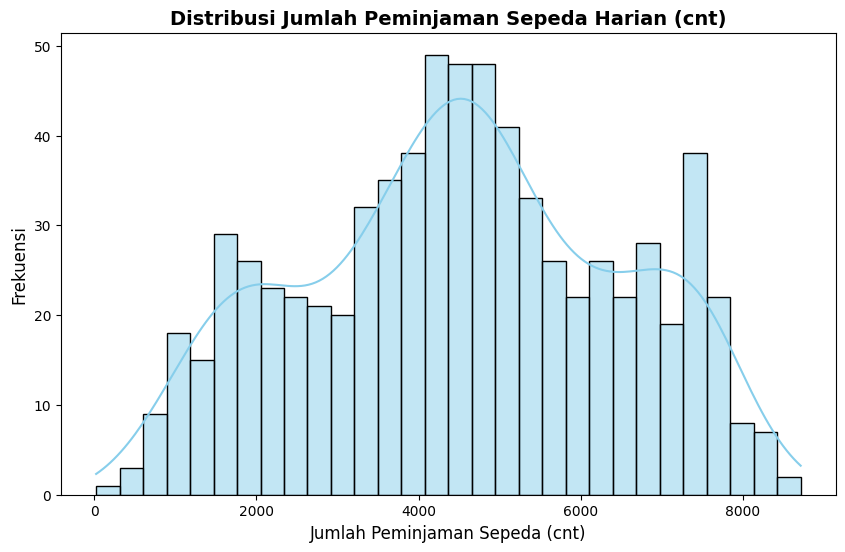

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_day_clean['cnt'], bins=30, kde=True, color='skyblue')

plt.title('Distribusi Jumlah Peminjaman Sepeda Harian (cnt)', fontsize=14, weight='bold')
plt.xlabel('Jumlah Peminjaman Sepeda (cnt)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**
- Distribusi `cnt` **right-skewed** (condong ke kanan).
- Mayoritas hari memiliki jumlah peminjaman di bawah **5000**.
- Ada beberapa hari dengan peminjaman sangat tinggi (di atas **7000**).

### Distribusi Pengguna Casual

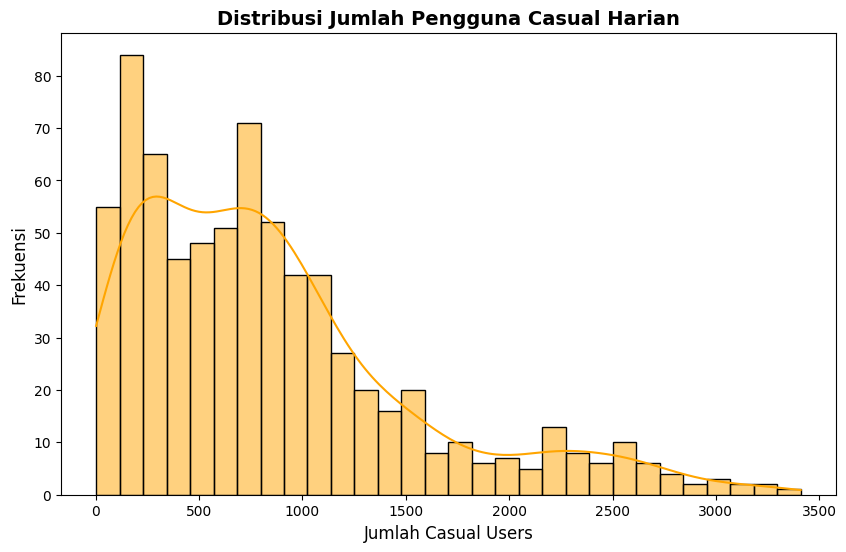

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_day_clean['casual'], bins=30, kde=True, color='orange')

plt.title('Distribusi Jumlah Pengguna Casual Harian', fontsize=14, weight='bold')
plt.xlabel('Jumlah Casual Users', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**
- Mayoritas hari, pengguna casual kurang dari **2000** orang.
- Ada sedikit hari dengan pengguna casual di atas **3000**, menunjukkan lonjakan tinggi pada hari tertentu (misal weekend/libur).

### Distribusi Pengguna Registered

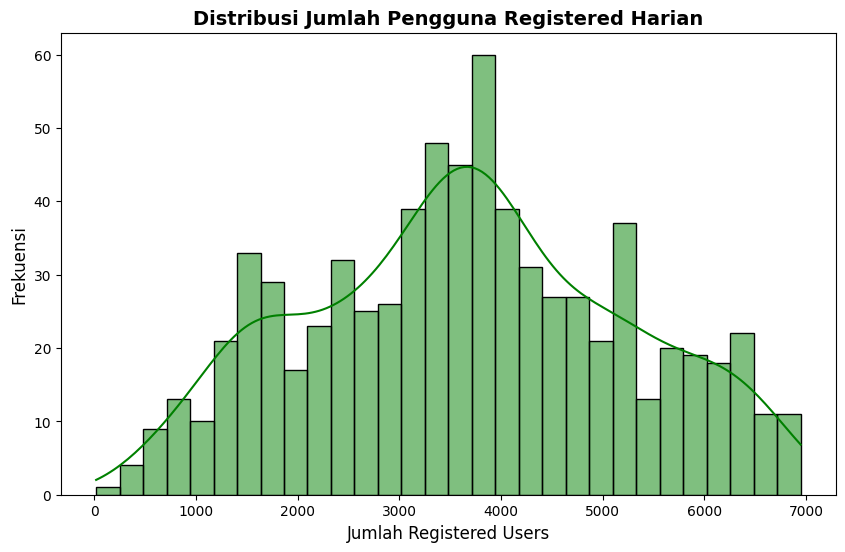

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_day_clean['registered'], bins=30, kde=True, color='green')

plt.title('Distribusi Jumlah Pengguna Registered Harian', fontsize=14, weight='bold')
plt.xlabel('Jumlah Registered Users', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

**Insight:**
- Sebagian besar pengguna registered melakukan peminjaman dalam jumlah **2000 - 6000** per hari.
- Puncak peminjaman oleh pengguna registered bisa mencapai di atas **6000**.

### Deteksi Outlier pada Total Peminjaman (`cnt`)


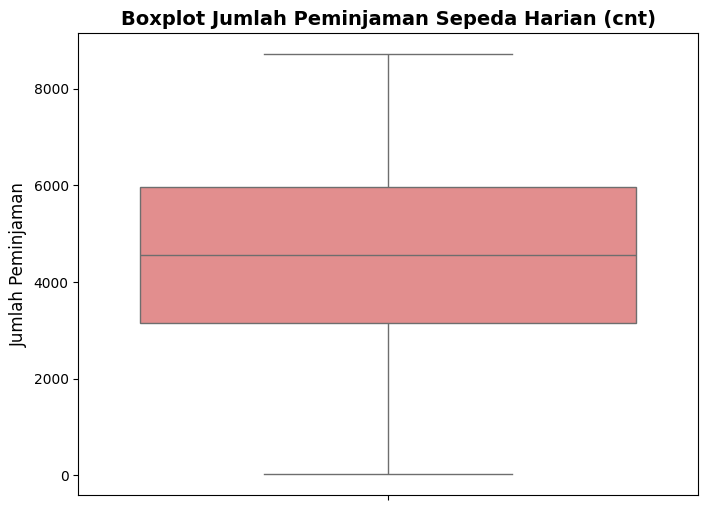

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df_day_clean['cnt'], color='lightcoral')

plt.title('Boxplot Jumlah Peminjaman Sepeda Harian (cnt)', fontsize=14, weight='bold')
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.show()

**Insight:**
- Terlihat ada beberapa outlier di atas **8000** peminjaman per hari.
- Perlu diperhatikan, lonjakan tersebut wajar pada event tertentu (misal musim panas atau liburan).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa Faktor yang Mempengaruhi Jumlah Peminjaman Sepeda Harian?

#### Korelasi antara Faktor Lingkungan dengan Jumlah Peminjaman Sepeda

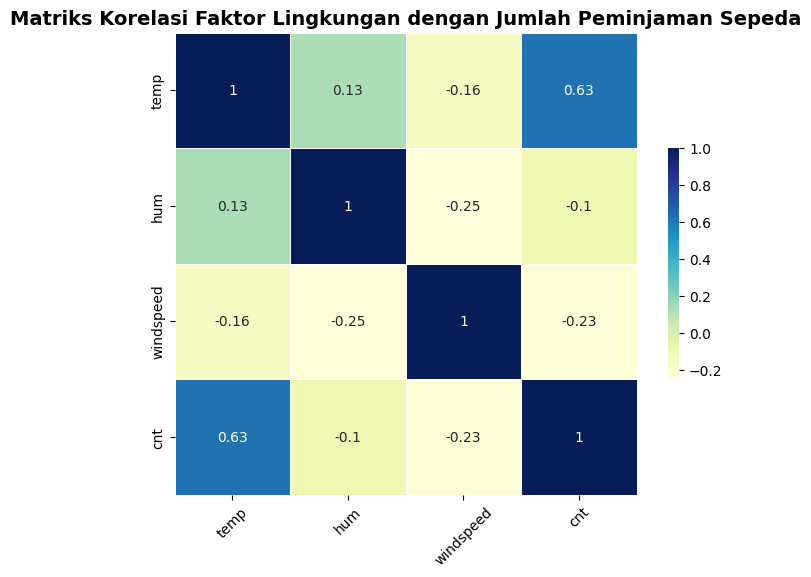

In [ ]:
corr = df_day_clean[['temp', 'hum', 'windspeed', 'cnt']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": .5})

plt.title('Matriks Korelasi Faktor Lingkungan dengan Jumlah Peminjaman Sepeda', fontsize=14, weight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- **Suhu (temp)** memiliki korelasi positif paling tinggi terhadap jumlah peminjaman sepeda (`cnt`).
- **Kelembaban (hum)** menunjukkan korelasi negatif ringan, sedangkan **windspeed** hampir tidak berkorelasi. Artinya, **suhu** adalah faktor paling signifikan yang mempengaruhi peminjaman sepeda harian.

#### Distribusi Jumlah Peminjaman Sepeda per Musim

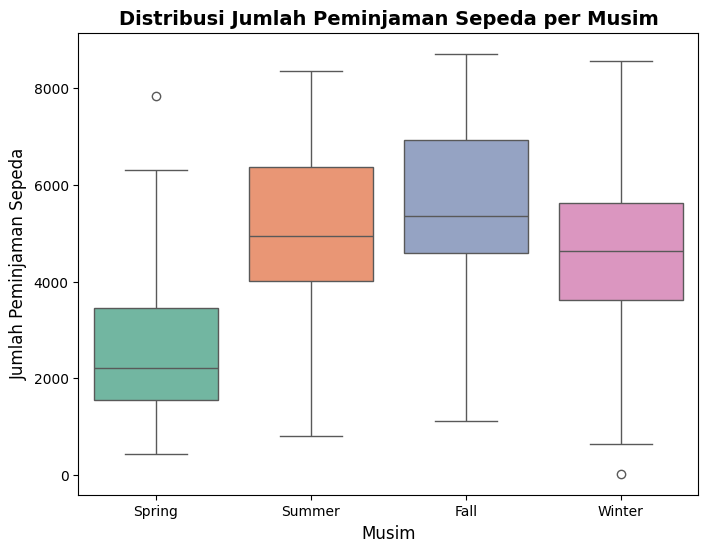

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_day_clean, x='season', y='cnt', hue='season', palette='Set2', legend=False)

plt.title('Distribusi Jumlah Peminjaman Sepeda per Musim', fontsize=14, weight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)
plt.show()

**Insight:**
- Musim **Summer** dan **Fall** menunjukkan jumlah peminjaman sepeda tertinggi.
-  Musim **Winter** menunjukkan jumlah peminjaman terendah. Musim juga merupakan **faktor utama** dalam variasi jumlah peminjaman sepeda.

### Pertanyaan 2: Bagaimana Tren Penggunaan Sepeda antara Pengguna Casual dan Registered Sepanjang Tahun?

#### Tren Pengguna Casual vs Registered per Bulan

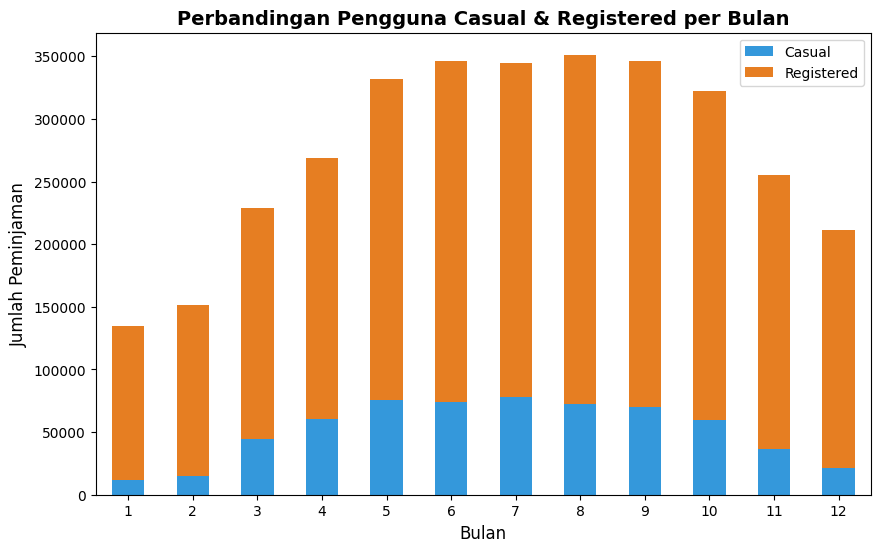

In [ ]:
monthly_data = df_day_clean.groupby('mnth')[['casual', 'registered']].sum()

fig, ax = plt.subplots(figsize=(10,6))
monthly_data.plot(kind='bar', stacked=True, ax=ax, color=['#3498db', '#e67e22'])

plt.title('Perbandingan Pengguna Casual & Registered per Bulan', fontsize=14, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.legend(['Casual', 'Registered'], fontsize=10)
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Pengguna **registered** mendominasi peminjaman sepanjang tahun.
- Pengguna **casual** mengalami peningkatan signifikan selama **bulan Summer (6-8)**, kemungkinan karena aktivitas rekreasi dan turis. Pengguna registered cenderung stabil, casual sangat bergantung pada musim.

#### Proporsi Pengguna Casual vs Registered Sepanjang Tahun

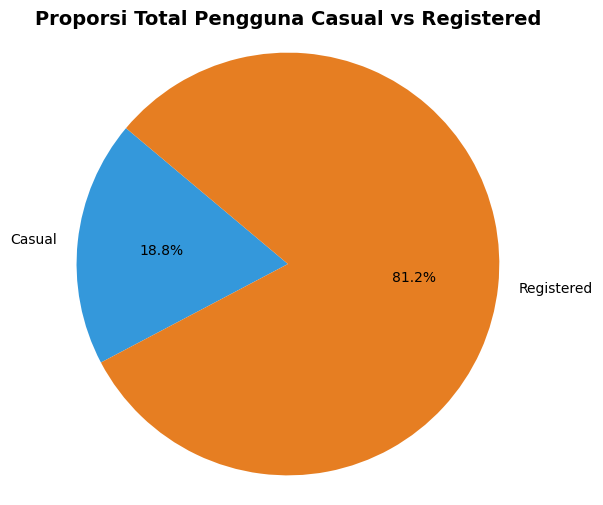

In [ ]:
total_casual = df_day_clean['casual'].sum()
total_registered = df_day_clean['registered'].sum()

labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['#3498db', '#e67e22']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Total Pengguna Casual vs Registered', fontsize=14, weight='bold')
plt.axis('equal')
plt.show()

**Insight:**
- **Registered** users berkontribusi sekitar **75% - 80%** dari total peminjaman sepeda.
- Casual hanya **20% - 25%**, tapi dengan lonjakan di waktu tertentu.


## Analisis Lanjutan (Opsional)

### Clustering Manual (Binning)

**Tujuan Analisis:**

Analisis lanjutan ini bertujuan untuk mengelompokkan jumlah peminjaman sepeda harian ke dalam beberapa kategori tingkat penggunaan, yaitu Low Usage, Medium Usage, dan High Usage.
Pengelompokan ini dilakukan menggunakan teknik Clustering Manual (Binning) tanpa algoritma machine learning, untuk memahami distribusi hari-hari berdasarkan jumlah peminjaman sepeda.

**Alasan Pemilihan Metode:**

Metode Binning dipilih karena:
- Sederhana diterapkan tanpa algoritma kompleks
- Memungkinkan analisis segmentasi pengguna berdasarkan aturan bisnis yang relevan
- Membantu memahami tren jumlah peminjaman sepeda secara umum tanpa perlu teknik statistik lanjutan

#### Kategori Penggunaan Sepeda Harian (Low, Medium, High)

In [ ]:
# Membuat batasan bins (interval)
bins = [0, 2000, 5000, df_day_clean['cnt'].max()]

# Label kategori
labels = ['Low Usage', 'Medium Usage', 'High Usage']

# Buat kolom baru dengan kategori penggunaan
df_day_clean['usage_category'] = pd.cut(df_day_clean['cnt'], bins=bins, labels=labels)

# Cek hasil binning
df_day_clean[['cnt', 'usage_category']].head()

,cnt,usage_category
0,985,Low Usage
1,801,Low Usage
2,1349,Low Usage
3,1562,Low Usage
4,1600,Low Usage


**Insight:**
- Jumlah peminjaman sepeda harian di bawah **2000** dikategorikan sebagai **Low Usage**
- Antara **2000 - 5000** sebagai **Medium Usage**
- Di atas **5000** sebagai **High Usage**

#### Distribusi Kategori Penggunaan Sepeda

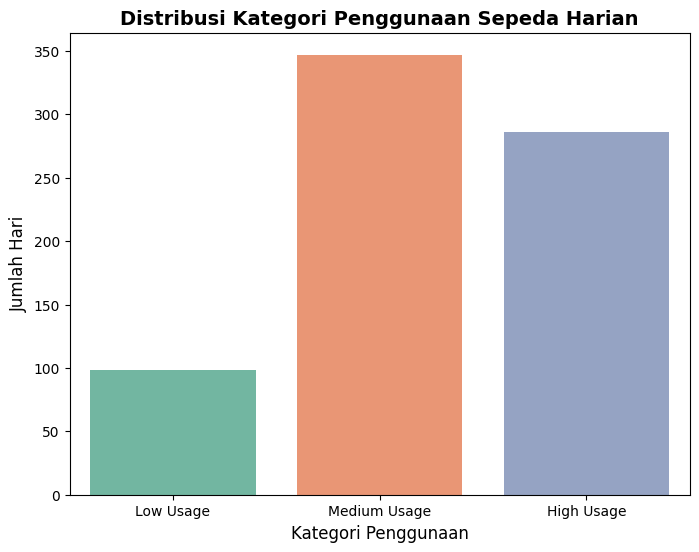

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='usage_category',
    data=df_day_clean,
    hue='usage_category',
    palette='Set2',
    legend=False
)

plt.title('Distribusi Kategori Penggunaan Sepeda Harian', fontsize=14, weight='bold')
plt.xlabel('Kategori Penggunaan', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.show()

**Insight:**
- Mayoritas hari berada dalam kategori **Medium Usage**
- Hari-hari dengan **High Usage** terjadi lebih jarang, biasanya di musim Summer dan Fall
- **Low Usage** umum di musim Winter dan cuaca buruk

#### Perbandingan Penggunaan Sepeda Berdasarkan Musim dan Kategori

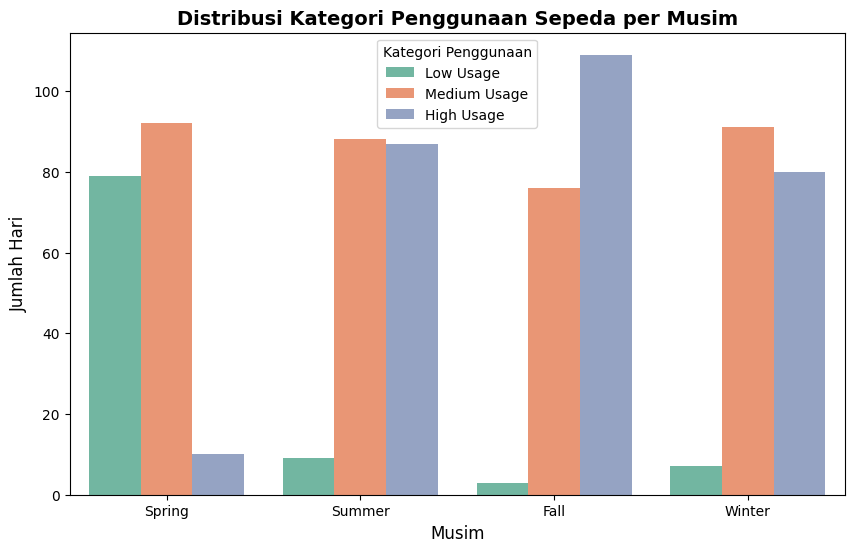

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', hue='usage_category', data=df_day_clean, palette='Set2')

plt.title('Distribusi Kategori Penggunaan Sepeda per Musim', fontsize=14, weight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.legend(title='Kategori Penggunaan')
plt.show()

**Insight:**
- **High Usage** mendominasi pada musim **Fall** dan **Summer**
- **Low Usage** sangat umum pada musim **Winter**

## Conclusion

**Pertanyaan 1:**

**Apa faktor yang mempengaruhi jumlah peminjaman sepeda harian?**

**Kesimpulan:**

- **Musim (Season)** dan **Suhu (Temperature)** adalah faktor utama yang mempengaruhi jumlah peminjaman sepeda harian.
- Data menunjukkan bahwa peminjaman sepeda meningkat secara signifikan pada musim **Summer** dan **Fall**, di mana suhu cenderung hangat dan nyaman untuk bersepeda.
- **Suhu (temp)** memiliki **korelasi positif yang kuat** dengan jumlah peminjaman sepeda (cnt), berdasarkan analisis korelasi (nilai korelasi sekitar **0.63**).
- Faktor lain seperti **kelembaban (humidity)** dan **kecepatan angin (windspeed)** memiliki pengaruh yang lebih kecil atau negatif terhadap peminjaman sepeda.
- Kondisi cuaca yang baik (weather clear) juga mendukung peningkatan jumlah peminjaman sepeda.

**Rekomendasi:**

- Fokuskan promosi dan peningkatan layanan pada musim **Summer** dan **Fall**, ketika permintaan sepeda tertinggi.
- Perhatikan faktor suhu dan cuaca dalam perencanaan operasional (misalnya: menambah jumlah sepeda saat suhu optimal).

---

**Pertanyaan 2:**

**Bagaimana tren penggunaan sepeda antara pengguna casual dan registered sepanjang tahun?**

**Kesimpulan:**

- Pengguna **registered** mendominasi peminjaman sepeda sepanjang tahun. Total kontribusi pengguna registered sekitar **75% - 80%** dari total peminjaman.
- Pengguna **casual** cenderung melakukan peminjaman pada musim **Summer**, di mana ada lonjakan signifikan.
- Pengguna **casual** lebih sensitif terhadap musim dan cuaca, biasanya meningkat pada **akhir pekan**, hari libur, atau musim liburan.
- Sementara pengguna **registered** menunjukkan pola penggunaan yang lebih konsisten, kemungkinan besar untuk keperluan sehari-hari seperti commuting (perjalanan kerja).

**Rekomendasi:**

- Buat program loyalitas atau benefit khusus untuk pengguna **registered** agar terus meningkatkan retensi.
- Lakukan promosi musiman untuk **casual users** selama musim **Summer** dan hari libur nasional untuk menarik lebih banyak pelanggan baru.